In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# SQL LOGIN
import os
host = os.getenv('sqlHOST')
username = os.getenv('sqlUSER')
password = os.getenv('sqlPSWD')

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# sklearn:
from sklearn.preprocessing import MinMaxScaler

#new imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

# import our own wrangle module
import wrangle

In [2]:
# PLANNING STAGE
#     See README.md

In [3]:
# ACQUISITION STAGE
#     Run new_telco_data function
#     Ruj get_telco_data function
df = pd.read_csv('telco.csv')
df.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,1,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,2,1,2,1,0004-TLHLJ,Male,0,No,No,4,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df.shape

(7043, 25)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7043.0,3521.000000,2033.283305,0.00,1760.5,3521.00,5281.50,7042.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   payment_type_id           7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   contract_type_id          7043 non-null   int64  
 4   customer_id               7043 non-null   object 
 5   gender                    7043 non-null   object 
 6   senior_citizen            7043 non-null   int64  
 7   partner                   7043 non-null   object 
 8   dependents                7043 non-null   object 
 9   tenure                    7043 non-null   int64  
 10  phone_service             7043 non-null   object 
 11  multiple_lines            7043 non-null   object 
 12  online_security           7043 non-null   object 
 13  online_backup             7043 non-null   object 
 14  device_p

In [7]:
# No null values found
df.isnull().sum()

Unnamed: 0                  0
payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

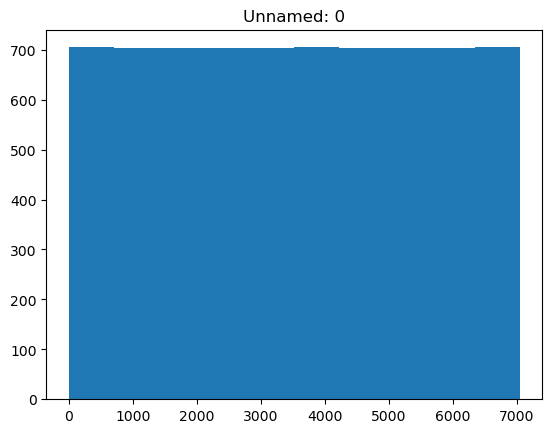

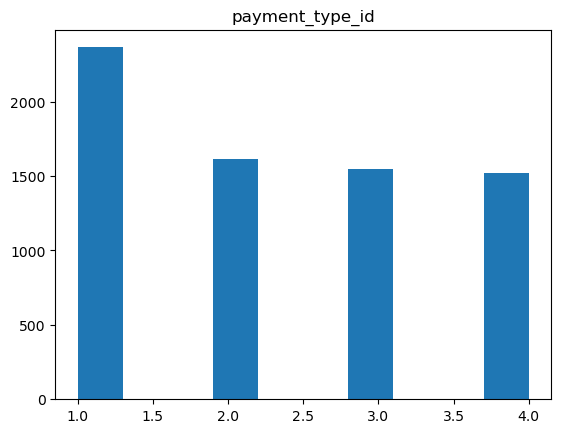

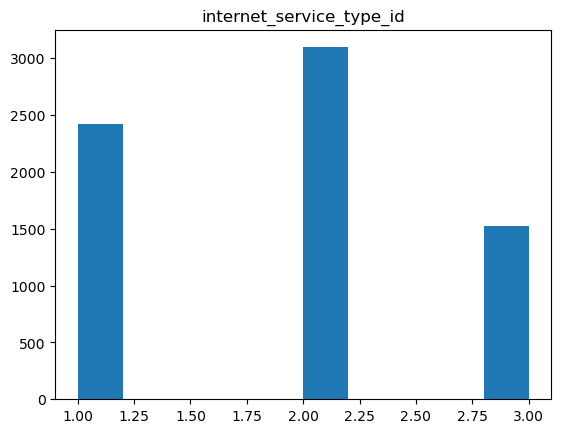

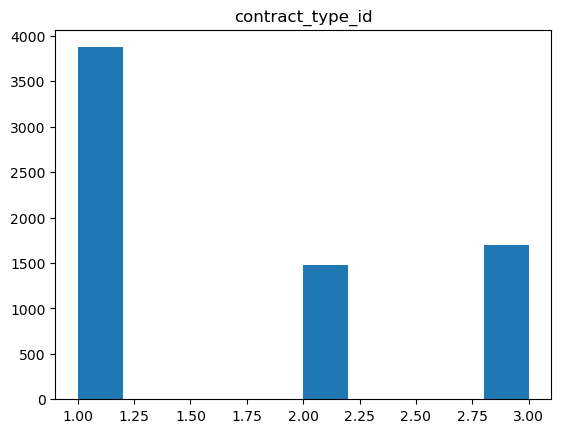

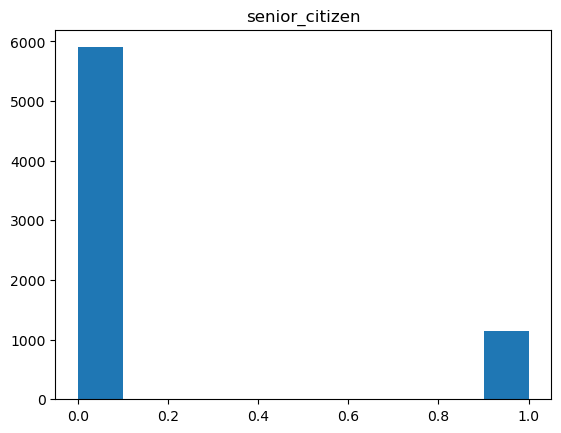

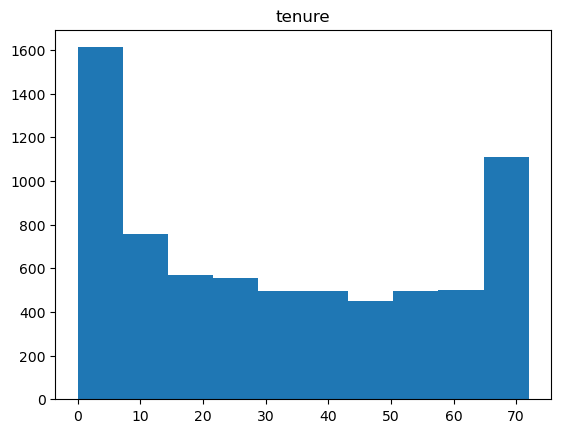

In [8]:
# Check out distributions of numeric columns.

num_cols = df.columns[[df[col].dtype == 'int64' for col in df.columns]]
for col in num_cols:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [9]:
df.columns

Index(['Unnamed: 0', 'payment_type_id', 'internet_service_type_id',
       'contract_type_id', 'customer_id', 'gender', 'senior_citizen',
       'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'paperless_billing',
       'monthly_charges', 'total_charges', 'churn', 'contract_type',
       'internet_service_type', 'payment_type'],
      dtype='object')

In [10]:
# PREPARATION STAGE
#     Run prep_telco_data function to clean data
#     Split data into train, validate and test sample dataframes

In [11]:
# THIS WAS RUNNING UNTIL I DELETED TENURE COLUMN AND RESTARTED THE KERNEL

clean_telco = wrangle.prep_telco_data(df)     # need to call dataframe inside parentheses
clean_telco.head(2)

,churn,contract_type,internet_service_type,payment_type
0,No,One year,DSL,Mailed check
1,No,Month-to-month,DSL,Mailed check


In [12]:
telco_cats = clean_telco[['contract_type', 'internet_service_type', 'payment_type']]
telco_cats

,contract_type,internet_service_type,payment_type
0,One year,DSL,Mailed check
1,Month-to-month,DSL,Mailed check
2,Month-to-month,Fiber optic,Electronic check
3,Month-to-month,Fiber optic,Electronic check
4,Month-to-month,Fiber optic,Mailed check
...,...,...,...
7038,One year,DSL,Mailed check
7039,Month-to-month,Fiber optic,Electronic check
7040,Month-to-month,DSL,Mailed check
7041,Two year,DSL,Mailed check


In [13]:
telco_cats = pd.get_dummies(telco_cats)
telco_cats

,contract_type_Month-to-month,contract_type_One year,contract_type_Two year,internet_service_type_DSL,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Bank transfer (automatic),payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,0,0,0,0,1
2,1,0,0,0,1,0,0,0,1,0
3,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,0,0,0,0,1
7039,1,0,0,0,1,0,0,0,1,0
7040,1,0,0,1,0,0,0,0,0,1
7041,0,0,1,1,0,0,0,0,0,1


In [14]:
telco_names = clean_telco[['contract_type', 'internet_service_type', 'payment_type', 'churn']]
telco_names

,contract_type,internet_service_type,payment_type,churn
0,One year,DSL,Mailed check,No
1,Month-to-month,DSL,Mailed check,No
2,Month-to-month,Fiber optic,Electronic check,Yes
3,Month-to-month,Fiber optic,Electronic check,Yes
4,Month-to-month,Fiber optic,Mailed check,Yes
...,...,...,...,...
7038,One year,DSL,Mailed check,No
7039,Month-to-month,Fiber optic,Electronic check,Yes
7040,Month-to-month,DSL,Mailed check,No
7041,Two year,DSL,Mailed check,No


In [15]:
# telco_full = telco_cats.join(telco_names, how = 'left', lsuffix-'left', rsuffix='right')
# telco_full

In [16]:
clean_telco.columns

Index(['churn', 'contract_type', 'internet_service_type', 'payment_type'], dtype='object')

In [17]:
# 20% test, 80% train_validate
# then of the 80% train_validate: 30% validate, 70% train. 

# train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
# train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.survived)

train, test = train_test_split(clean_telco, test_size=.2, random_state=123)
train, validate = train_test_split(train, test_size=.3, random_state=123)
train.head()

,churn,contract_type,internet_service_type,payment_type
4604,No,Month-to-month,None,Mailed check
5566,No,One year,DSL,Credit card (automatic)
6204,No,Two year,Fiber optic,Credit card (automatic)
5837,No,Month-to-month,Fiber optic,Credit card (automatic)
1276,No,Two year,DSL,Mailed check


In [18]:
# Validate my split.

print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (3943, 4)
validate -> (1691, 4)
test -> (1409, 4)


In [19]:
# EXPLORATION AND PRE-PROCESSING STAGE

In [20]:
# Use a chi2 test to measure the independence of churn to payment type, contract type and internet
# service type.
#     -- We use a chi2 test because all of our variables are categorical
#     -- We do not have any continuous variables

In [21]:
# 1. Payment Type
# Null hypothesis: Payment type has no impact on churn likelihood.
# Alternative hypothesis: Payment type does have an impact on churn likelihood.

payment_type = pd.crosstab(train.churn, train.payment_type)    #change df to train.payment_type_id
payment_type

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
churn,,,,
No,734,725,672,762
Yes,146,130,604,170


In [22]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(payment_type)

# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(payment_type.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(payment_type.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[734 725 672 762]
 [146 130 604 170]]
---
Expected Values

payment_type  Bank transfer (automatic)  Credit card (automatic)  \
churn                                                              
No                                  734                      725   
Yes                                 146                      130   

payment_type  Electronic check  Mailed check  
churn                                         
No                         672           762  
Yes                        604           170  
---

chi^2 = 416.0771
p     = 0.0000


In [23]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    
# Payment type does have an impact on churn likelihood because the p-value is less than the alpha.

We reject the null hypothesis


In [24]:
# 2. Contract type
# Null hypothesis: Contract type has no impact on churn likelihood.
# Alternative hypothesis: Contract type does have an impact on churn likelihood.

contract_type = pd.crosstab(train.churn, train.contract_type)
contract_type

contract_type,Month-to-month,One year,Two year
churn,,,
No,1225,740,928
Yes,931,86,33


In [25]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(contract_type)

# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(contract_type.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(contract_type.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[1225  740  928]
 [ 931   86   33]]
---
Expected Values

contract_type  Month-to-month  One year  Two year
churn                                            
No                       1225       740       928
Yes                       931        86        33
---

chi^2 = 678.1617
p     = 0.0000


In [26]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    
# Contract type does have an impact on churn likelihood because the p-value is less than the alpha.

We reject the null hypothesis


In [27]:
# 3. Internet Service Type
# Null hypothesis: Internet service type has no impact on churn likelihood.
# Alternative hypothesis: Internet service type does have an impact on churn likelihood.

internet_service_type = pd.crosstab(train.churn, train.internet_service_type)
internet_service_type

internet_service_type,DSL,Fiber optic,None
churn,,,
No,1102,993,798
Yes,259,727,64


In [28]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(internet_service_type)

# print 'Observed Values' followed by a new line
print('Observed Values\n')

# print the values from the 'observed' dataframe
print(internet_service_type.values)

# print --- and then a new line, 'Expected Values', followed by another new line
print('---\nExpected Values\n')

# print the expected values array
print(internet_service_type.astype(int))

# print a new line
print('---\n')

# print the chi2 value, formatted to a float with 4 digits. 
print(f'chi^2 = {chi2:.4f}') 

# print the p-value, formatted to a float with 4 digits. 
print(f'p     = {p:.4f}')

Observed Values

[[1102  993  798]
 [ 259  727   64]]
---
Expected Values

internet_service_type   DSL  Fiber optic  None
churn                                         
No                     1102          993   798
Yes                     259          727    64
---

chi^2 = 418.2304
p     = 0.0000


In [29]:
if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')
    
# Internet service type does have an impact on churn likelihood because the p-value is less than the alpha.

We reject the null hypothesis


CONCLUSION: Payment type, contract type and internet service type each impacts the likelihood of customer churn.

In [30]:
# MODELING STAGE

In [31]:
# Decision Tree

In [32]:
train.churn

4604     No
5566     No
6204     No
5837     No
1276     No
       ... 
1794    Yes
817      No
901     Yes
1987    Yes
6958     No
Name: churn, Length: 3943, dtype: object

In [33]:
# Decision Tree

In [34]:
baseline_accuracy = (train.churn == 'No').mean()
baseline_accuracy

0.7337053005325894

In [35]:
#pd.concat([train.iloc[:,1:3], train.iloc[:,5:]], axis=1)

In [37]:
X_train = train.drop(columns=['churn'])
X_train = pd.get_dummies(X_train)
X_train.head()

In [ ]:
X_validate = validate.drop(columns=['churn'])
X_test = test.drop(columns=['churn'])

In [ ]:
X_validate = train.drop(columns=['churn', 'churn_encoded', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
X_validate = pd.get_dummies(X_train)

In [ ]:
X_test = train.drop(columns=['churn', 'churn_encoded', 'payment_type_id', 'internet_service_type_id', 'contract_type_id'])
X_test = pd.get_dummies(X_train)

In [38]:
y_train = train.churn
y_train.head()

4604    No
5566    No
6204    No
5837    No
1276    No
Name: churn, dtype: object

In [ ]:
y_validate = validate.churn
y_test = test.churn

In [ ]:
    # Generate a blank, new Decision Tree model
clf = DecisionTreeClassifier(max_depth=3, random_state=123)

In [ ]:
   # Train model on the training data
clf = clf.fit(X_train, y_train)

In [ ]:
clf.predict(X_train)

In [ ]:
    # Evaluate in-sample results using the model score, confusion matrix, and classification report.
clf.score(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_train)

In [ ]:
conf = confusion_matrix(y_train, y_pred)
conf

In [ ]:
labels = sorted(y_train.unique())
labels

In [ ]:
pd.DataFrame(conf)

In [ ]:
print(classification_report(y_train, y_pred))

In [ ]:
    # Compute Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, 
    # and support.

In [ ]:
conf

In [ ]:
pd.DataFrame(conf,
            index=[str(label) + '_actual'for label in labels],
            columns=[str(label) + '_predict'for label in labels])

In [ ]:
conf.ravel()

In [ ]:
TN, FP, FN, TP = conf.ravel()
TN, FP, FN, TP

In [ ]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [ ]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

In [ ]:
    # Run through steps 2-4 using a different max_depth value.

In [ ]:
clf = DecisionTreeClassifier(max_depth=30)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

In [ ]:
for x in range(1,32):
#     print(x)
    clf = DecisionTreeClassifier(max_depth=x)
    clf.fit(X_train, y_train)
    acc = clf.score(X_train, y_train)
    print(f'for depth of {x:2}, the accuracy is {round(acc,2)}')

CONCLUSION: All models perform identically with in-sample data

In [ ]:
# Random Forests

In [ ]:
# X_train = train.drop(columns=['churn'])
# y_train = train.churn

# X_validate = validate.drop(columns=['churn'])
# y_validate = validate.churn

# X_test = test.drop(columns=['churn'])
# y_test = test.churn

In [ ]:
# Make the model
forest1 = RandomForestClassifier(max_depth=1, random_state=123)

# Fit the model (on train and only train)
forest1.fit(X_train, y_train)

# Use the model
# We'll evaluate the model's performance on train, first
y_predictions = forest1.predict(X_train)

# Produce the classification report on the actual y values and this model's predicted y values
report = classification_report(y_train, y_predictions, output_dict=True)
print("Tree of 1 depth")
pd.DataFrame(report)

In [ ]:
    # sklearn confusion matrix
pd.DataFrame(confusion_matrix(y_predictions, y_train))

In [ ]:
ConfusionMatrixDisplay.from_estimator(forest1, X_train, y_train);

In [ ]:
TN, FP, FN, TP = confusion_matrix(y_train,y_predictions).ravel()
ALL = TP + TN + FP + FN

TP, TN, FP, FN

In [ ]:
    # Compute Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, 
    # and support.

In [ ]:
accuracy = (TP + TN)/ALL
print(f"Accuracy: {accuracy}")

true_positive_rate = TP/(TP+FN)
print(f"True Positive Rate: {true_positive_rate}")

false_positive_rate = FP/(FP+TN)
print(f"False Positive Rate: {false_positive_rate}")

true_negative_rate = TN/(TN+FP)
print(f"True Negative Rate: {true_negative_rate}")

false_negative_rate = FN/(FN+TP)
print(f"False Negative Rate: {false_negative_rate}")

precision = TP/(TP+FP)
print(f"Precision: {precision}")

recall = TP/(TP+FN)
print(f"Recall: {recall}")

f1_score = 2*(precision*recall)/(precision+recall)
print(f"F1 Score: {f1_score}")

support_pos = TP + FN
print(f"Support (0): {support_pos}")

support_neg = FP + TN
print(f"Support (1): {support_neg}")

In [ ]:
    # Run using different max depth values.

In [ ]:
for i in range(2, 11):
    # Make the model
    forest = RandomForestClassifier(max_depth=i, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    y_predictions = forest.predict(X_train)

    # Produce the classification report on the actual y values and this model's predicted y values
    report = classification_report(y_train, y_predictions, output_dict=True)
    print(f"Tree with max depth of {i}")
    print(pd.DataFrame(report))
    print()

In [ ]:
clean_telco.plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [ ]:
# Compare in-sample to out-of-sample
metrics = []
max_depth = 20

for i in range(2, max_depth):
    # Make the model
    depth = max_depth - i
    n_samples = i
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)

    # Fit the model (on train and only train)
    forest = forest.fit(X_train, y_train)

    # Use the model
    # We'll evaluate the model's performance on train, first
    in_sample_accuracy = forest.score(X_train, y_train)
    
    out_of_sample_accuracy = forest.score(X_validate, y_validate)

    output = {
        "min_samples_per_leaf": n_samples,
        "max_depth": depth,
        "train_accuracy": in_sample_accuracy,
        "validate_accuracy": out_of_sample_accuracy
    }
    
    metrics.append(output)
    
df = pd.DataFrame(metrics)
df["difference"] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
X_train.shape

In [ ]:
X_validate.shape

In [ ]:
X_test.shape

In [ ]:
y_train.shape

CONCLUSION: What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [ ]:
# KNN

In [ ]:
    # Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)

In [ ]:
    # Evaluate results using the model score, confusion matrix, and classification report.

train_score = knn.score(X_train, y_train)
train_score

In [ ]:
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

In [ ]:
print(classification_report(y_train, y_train_pred))

In [ ]:
    # classification report as a df
pd.DataFrame(classification_report(y_train, 
                                   y_train_pred, 
                                   output_dict=True)).T

In [ ]:
    # Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, 
    # precision, recall, f1-score, and support.


tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

In [ ]:
    # Run through steps 1-3 setting k to 10

In [ ]:
k = 10
knn, y_train_pred, y_validate_pred = wrangle.knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, metrics_t = wrangle.evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, metrics_v = wrangle.evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [ ]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{metrics_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{metrics_v}

""")

In [ ]:
    # Run through steps 1-3 setting k to 20

In [ ]:
k = 20
knn, y_train_pred, y_validate_pred = wrangle.knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, metrics_t = wrangle.evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, metrics_v = wrangle.evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [ ]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{metrics_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{metrics_v}

""")

In [ ]:
# Logistic Regression

In [ ]:
    # Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["payment_type_id", "internet_service_type_id", "contract_type_id"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))# Create the logistic regression
logit = LogisticRegression(random_state=123)

# specify the features we're using
features = ["payment_type_id", "internet_service_type_id", "contract_type_id"]

# Fit a model using only these specified features
# logit.fit(X_train[["age", "pclass", "fare"]], y_train)
logit.fit(X_train[features], y_train)

# Since we .fit on a subset, we .predict on that same subset of features
y_pred = logit.predict(X_train[features])

print("Baseline is", round(baseline_accuracy, 2))
print("Logistic Regression using age, pclass, and fare features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train[features], y_train)))

In [ ]:
    # Only payment type
features = ["payment_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Only internet service type
features = ["internet_service_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Only contract type
features = ["contract_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Use best 3 models to predict/evaluate on validate sample

In [ ]:
features = ["payment_type_id", "internet_service_type_id", "contract_type_id"]

y_pred = logit.predict(X_validate[features])

print('Logit1 model using age, pclass, fare, and is_female as the features')
print(classification_report(y_validate, y_pred))

In [ ]:
    # All features, all default hyperparameters
logit2 = LogisticRegression(random_state=123)

logit2.fit(X_train, y_train)

y_pred = logit2.predict(X_train)

print("Model trained on all features")
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit2.score(X_train, y_train)))

In [ ]:
    # All features, but we'll use the class_weights to hold the actual ratios`
logit3 = LogisticRegression(random_state=123, class_weight='balanced')

logit3.fit(X_train, y_train)

y_pred = logit3.predict(X_train)

accuracy = logit3.score(X_train, y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Only payment type
features = ["payment_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Only internet service type
features = ["internet_service_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')

In [ ]:
    # Only contract type
features = ["contract_type_id"]

# All features, but we'll use the class_weights to hold the actual ratios
logit4 = LogisticRegression(random_state=123)

logit4.fit(X_train[features], y_train)

y_pred = logit4.predict(X_train[features])

accuracy = logit4.score(X_train[features], y_train)

print("All Features and we're setting the class_weight hyperparameter")
print(f'Accuracy of Logistic Regression classifier on training set: {accuracy:.2}')